In [1]:
import collections

import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
def create_freq(df):
    words = {} # word:count
    #sentences = ""
    for i, row in tqdm(df.iterrows()):
        text = row["_headline"] + " " +row["_description"]
        word_list = text.split(" ")
        #sentences += " ".join(word_list)+" "
        for w in word_list:
            if w in words.keys():
                words[w] += 1
            else:
                words[w] = 1
    return words#, sentences

In [3]:
def top_k(word_list, k=5):
    return sorted(word_list, key=word_list.get)[::-1][:k] # sorting in descending order

In [4]:
def plot_wordcloud(words,title):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(width = 1500, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 12).fit_words(words)#generate(words)
 
    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title)
    plt.show()

### Train DF analysis

In [5]:
train_df = pd.read_csv("./CSV/cleaned_completed_train.csv")
outage_df = train_df[train_df["network_impact"]=="Outage"]
no_impact_df = train_df[train_df["network_impact"]=="No_Impact"]
degraded_df = train_df[train_df["network_impact"]=="Degraded"]
threatened_df = train_df[train_df["network_impact"]=="Threatened"]

In [6]:
train_df.columns

Index(['_headline', '_description', 'network_impact'], dtype='object')

68995it [00:04, 16279.77it/s]


{'1': 3.119, '0': 3.098, '6': 2.155, '1,nsg': 1.809, '3': 1.414, '2': 1.28, 'qam256': 1.079, '2,nsg': 0.932, 'qam256,': 0.783, 'node': 0.76}


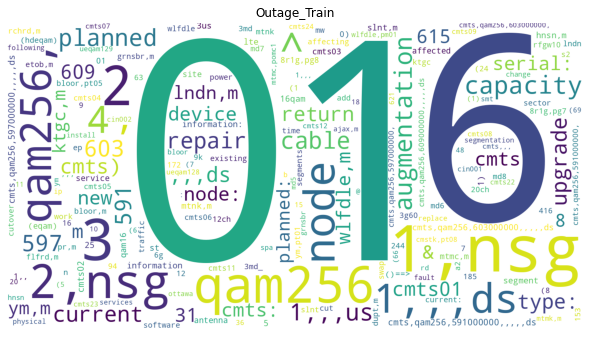

In [58]:
w = create_freq(outage_df)
top = top_k(w, k=10)
total_word = sum(w.values())
word_percentage = {word : round((w[word]/total_word)*100, 3) for word in top}
print(word_percentage)
plot_wordcloud(w, "Outage_Train")

99588it [00:06, 16482.54it/s]


{'0': 1.868, '1': 1.83, '6': 0.899, 'new': 0.814, '2': 0.683, '3': 0.604, '&': 0.518, 'planned': 0.513, '4': 0.498, '1,nsg': 0.491}


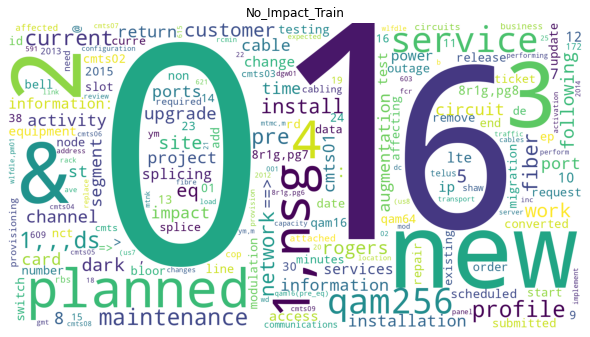

In [59]:
w = create_freq(no_impact_df)
top = top_k(w, k=10)
total_word = sum(w.values())
word_percentage = {word : round((w[word]/total_word)*100, 3) for word in top}
print(word_percentage)
plot_wordcloud(w, "No_Impact_Train")

12877it [00:00, 18052.92it/s]


{'cable': 1.129, 'new': 1.092, 'repair': 0.967, 'lte': 0.791, '1': 0.761, 'node': 0.736, 'service': 0.725, '2': 0.652, 'upgrade': 0.648, 'work': 0.643}


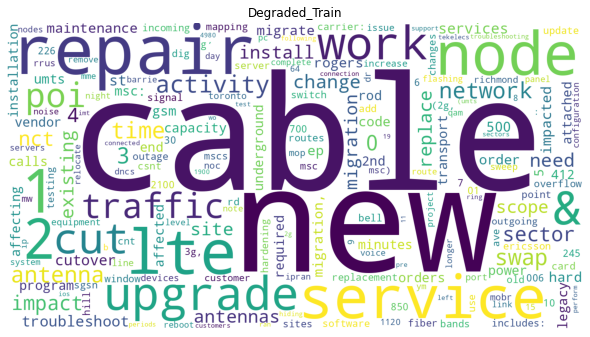

In [60]:
w = create_freq(degraded_df)
top = top_k(w, k=10)
total_word = sum(w.values())
word_percentage = {word : round((w[word]/total_word)*100, 3) for word in top}
print(word_percentage)
plot_wordcloud(w, "Degraded_Train")

28304it [00:01, 17136.72it/s]


{'ep': 0.908, 'new': 0.853, 'testing': 0.764, '1': 0.741, 'site': 0.704, '&': 0.698, 'service': 0.68, '2': 0.659, 'equipment': 0.625, 'battery': 0.581}


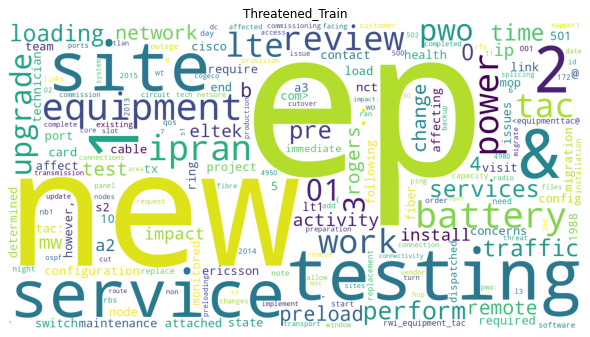

In [61]:
w = create_freq(threatened_df)
top = top_k(w, k=10)
total_word = sum(w.values())
word_percentage = {word : round((w[word]/total_word)*100, 3) for word in top}
print(word_percentage)
plot_wordcloud(w, "Threatened_Train")

### Test DF analysis

In [62]:
test_df = pd.read_csv("./CSV/cleaned_completed_test.csv")
outage_df = test_df[test_df["network_impact"]=="Outage"]
no_impact_df = test_df[test_df["network_impact"]=="No_Impact"]
degraded_df = test_df[test_df["network_impact"]=="Degraded"]
threatened_df = test_df[test_df["network_impact"]=="Threatened"]

17461it [00:01, 16317.30it/s]


{'0': 3.122, '1': 3.078, '6': 2.218, '1,nsg': 1.844, '3': 1.421, '2': 1.28, 'qam256': 1.129, '2,nsg': 0.935, 'qam256,': 0.8, 'node': 0.751}


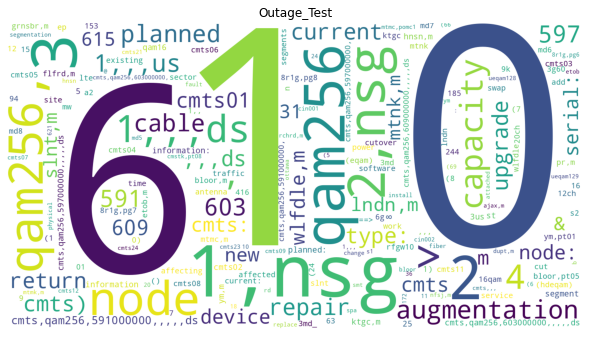

In [63]:
w = create_freq(outage_df)
top = top_k(w, k=10)
total_word = sum(w.values())
word_percentage = {word : round((w[word]/total_word)*100, 3) for word in top}
print(word_percentage)
plot_wordcloud(w, "Outage_Test")

24766it [00:01, 17299.25it/s]


{'1': 1.939, '0': 1.89, '6': 0.966, 'new': 0.777, '2': 0.706, '3': 0.618, 'planned': 0.538, '4': 0.532, '&': 0.508, '1,nsg': 0.507}


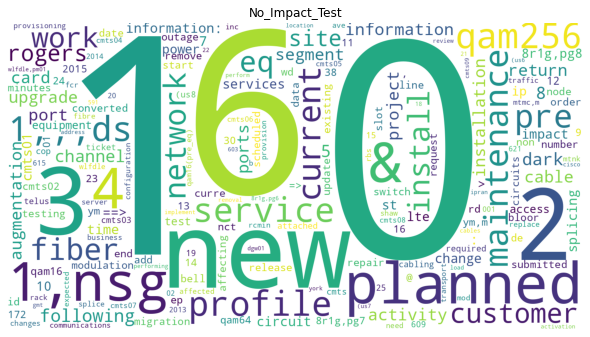

In [64]:
w = create_freq(no_impact_df)
top = top_k(w, k=10)
total_word = sum(w.values())
word_percentage = {word : round((w[word]/total_word)*100, 3) for word in top}
print(word_percentage)
plot_wordcloud(w, "No_Impact_Test")

3253it [00:00, 17721.60it/s]


{'cable': 1.094, 'new': 1.066, 'repair': 0.916, 'node': 0.817, 'lte': 0.74, 'service': 0.713, 'upgrade': 0.709, '1': 0.7, '2': 0.649, 'work': 0.64}


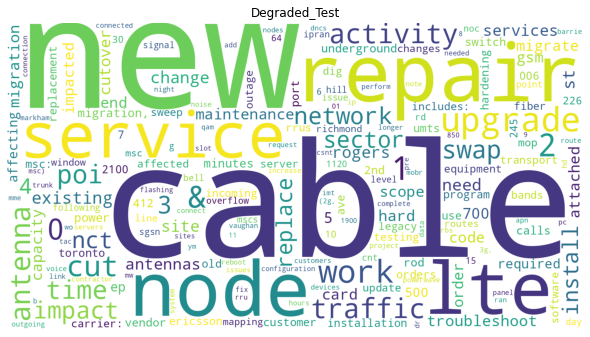

In [65]:
w = create_freq(degraded_df)
top = top_k(w, k=10)
total_word = sum(w.values())
word_percentage = {word : round((w[word]/total_word)*100, 3) for word in top}
print(word_percentage)
plot_wordcloud(w, "Degraded_Test")

6962it [00:00, 16787.10it/s]


{'ep': 0.898, 'new': 0.873, 'testing': 0.727, '1': 0.727, 'service': 0.689, 'site': 0.677, '&': 0.656, '2': 0.645, 'equipment': 0.617, 'ipran': 0.584}


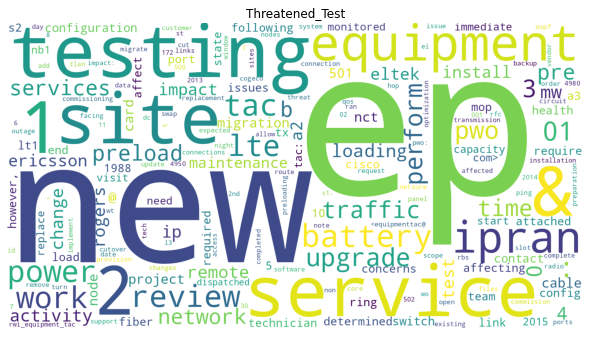

In [66]:
w = create_freq(threatened_df)
top = top_k(w, k=10)
total_word = sum(w.values())
word_percentage = {word : round((w[word]/total_word)*100, 3) for word in top}
print(word_percentage)
plot_wordcloud(w, "Threatened_Test")